In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


results_path = "../metrics_results"
# folders = [folder for folder in os.listdir(
#     results_path) if os.path.isdir(os.path.join(results_path, folder))]
# datasets = set([name.split('-')[-1].replace('.csv', '') for name in folders])
# datasets

In [16]:
algorithms = ["fdx", "pyro"]
datasets = ['abalone',
            'adult',
            'bridges',
            'echocardiogram',
            'iris',
            'letter',
            'ncvoter',
            'ncvoter_header',
            'wisconsin']

In [17]:


fds_results = {}

for dataset in datasets:
    for algorithm in algorithms:
        if algorithm == "fdx":
            folder_name = f"{algorithm}-{dataset}"
        else:
            folder_name = f"{algorithm}-{dataset}.csv"
        

        folder_path = os.path.join(results_path, folder_name)
        file_path = os.path.join(folder_path, "fds_results.csv")
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            fds_results[(algorithm, dataset)] = df
            # print(df.columns)
            # print(folder_path, '\t' ,file_path)


In [18]:
headers = [df.columns.tolist() for df in fds_results.values()]
distinct_headers = set(header for sublist in headers for header in sublist)
print("Headers:", distinct_headers)



Headers: {'rfi_prime_plus', 'mu_plus_is_key', 'rfi_fi', 'g1', 'g3_prime', 'mu_is_key', 'g3', 'mu', 'rfi_prime_plus_rfi', 'rfi', 'fd', 'mu_plus', 'g2'}


In [19]:

metric_name = "rfi_prime_plus"

global_df = pd.DataFrame(columns=["algorithm", "dataset", metric_name, "lhs_size"])

for (algo, dataset), df in fds_results.items():
    if metric_name in df.columns and "fd" in df.columns:
        temp_df = df[[metric_name]].copy()

        # Calculate LHS size based on 'fd' structure
        temp_df["lhs_size"] = df["fd"].str.split("->").str[0].str.count(",") + 1

        # Add identifying columns
        temp_df["algorithm"] = algo
        temp_df["dataset"] = dataset

        # Append to the global DataFrame
        global_df = pd.concat([global_df, temp_df], ignore_index=True)

# Check for correct dataset values
print(global_df["dataset"].value_counts())


df = global_df.copy()

dataset
letter            7211
ncvoter            761
bridges            549
echocardiogram     364
abalone             93
iris                19
Name: count, dtype: int64


/tmp/ipykernel_19998/1787614032.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  global_df = pd.concat([global_df, temp_df], ignore_index=True)


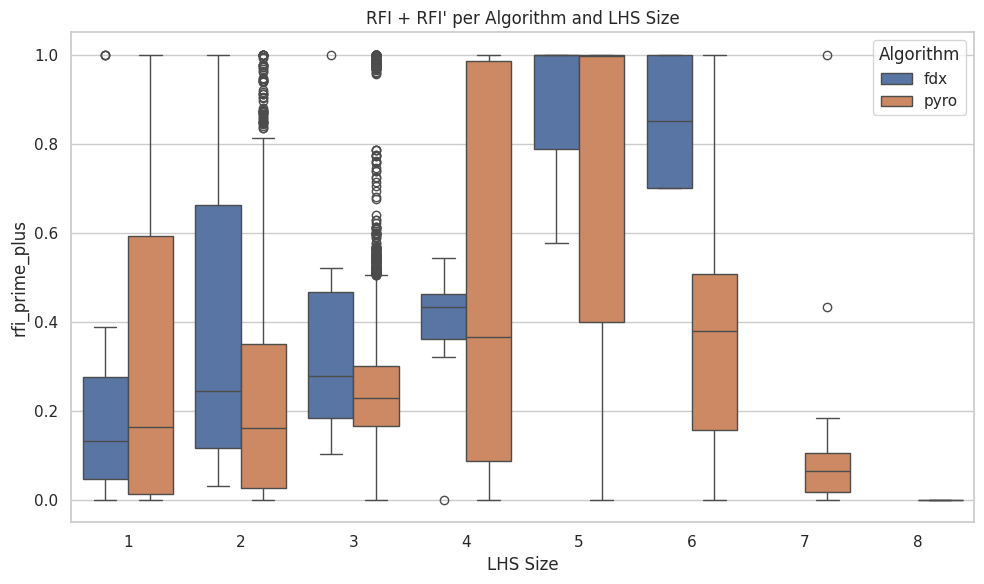

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=global_df,
    x='lhs_size',
    y=metric_name,
    hue='algorithm'
)

plt.title('RFI + RFI\' per Algorithm and LHS Size')
plt.xlabel('LHS Size')
plt.ylabel(metric_name)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

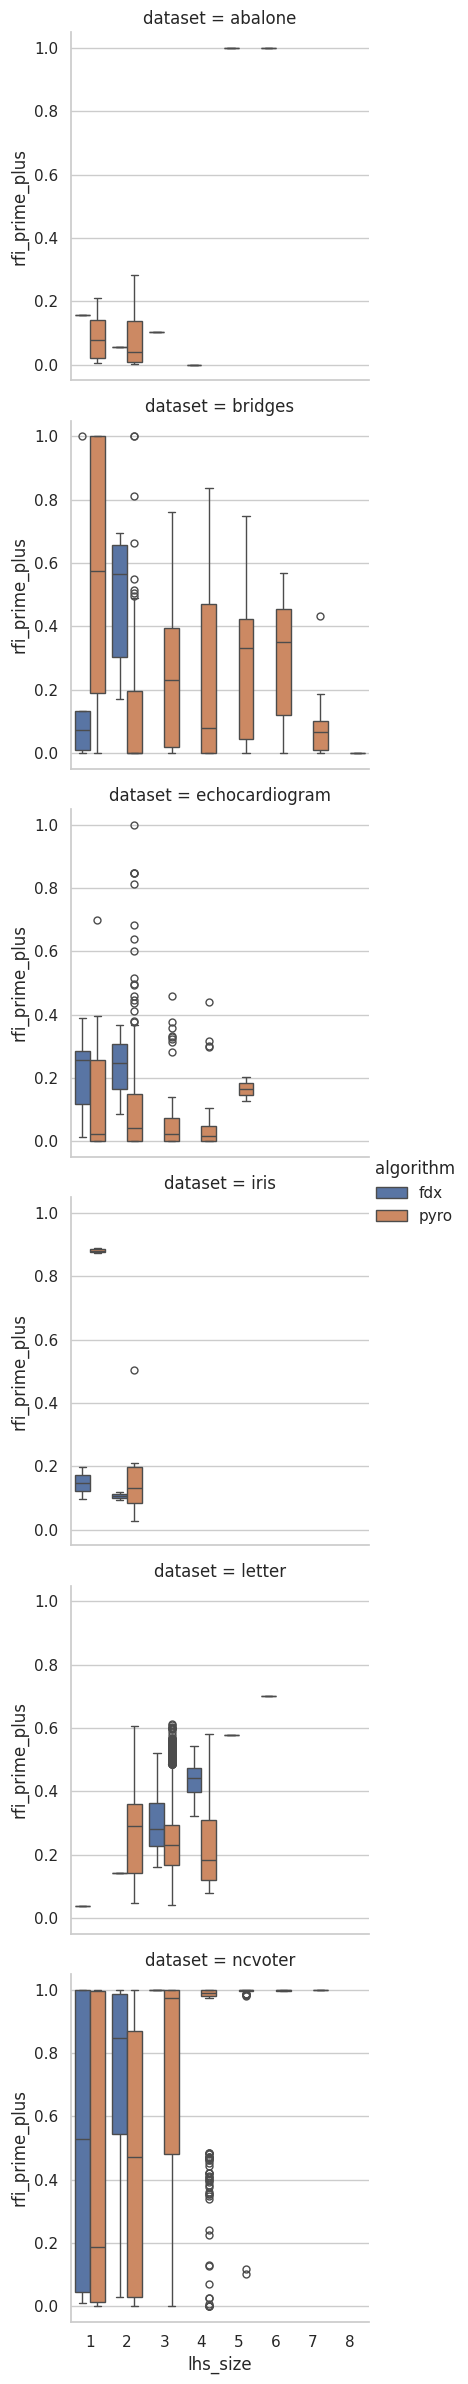

In [21]:
sns.catplot(
    data=global_df,
    x='lhs_size',
    y=metric_name,
    hue='algorithm',
    col='dataset',
    kind='box',
    col_wrap=1,
    height=4,
    aspect=1
)
